## Image Recognition Preprocessing - Green screen masking, OpenCV implementation
- by Kelvin Kong, 2017

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
image = cv2.imread('./shia_labeouf.jpg')
print("This image is :{} with dimensions: {}".format(type(image), image.shape))

This image is :<class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


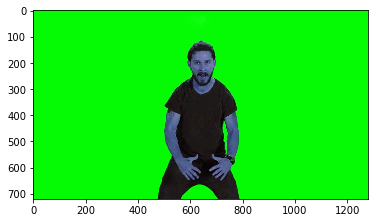

In [3]:
%matplotlib inline

#display the image
plt.imshow(image)

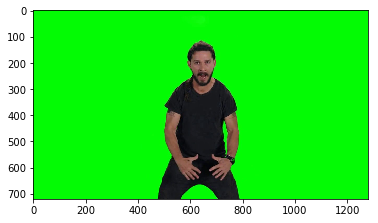

In [4]:
#Opencv loads image in BGR, convert it to RGB for easier visualization
img_rgb = np.copy(image)

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

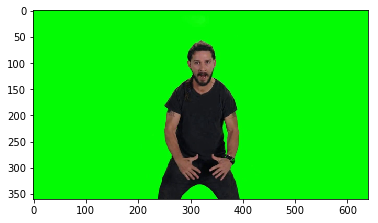

In [5]:
# Resize image by 50% smaller
resized = cv2.resize(img_rgb, (0,0), fx=0.5, fy=0.5)
plt.imshow(resized)

img_rgb = resized

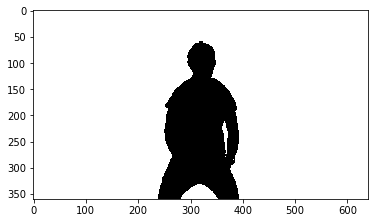

In [6]:
lower_green = np.array([0,120,0])
upper_green = np.array([135,255,135])
## Create a mask
mask = cv2.inRange(img_rgb, lower_green, upper_green)


# Visualize the mask
plt.imshow(mask, cmap='gray')

# green = np.zeros((50,50,3))
# green.shape
# green[:,:,1] = 254
# green[:2,:2,:]
# plt.imshow(green)


(360, 640, 3)

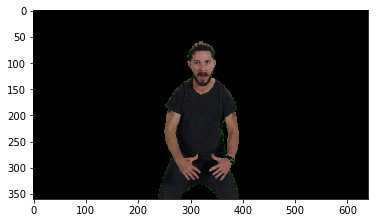

In [7]:
# Now block the green screen, and let shia show through, turn the rest to black

masked_image = np.copy(img_rgb)
masked_image[mask != 0 ] = [0, 0, 0]
plt.imshow(masked_image)
masked_image.shape

(400, 640, 3)

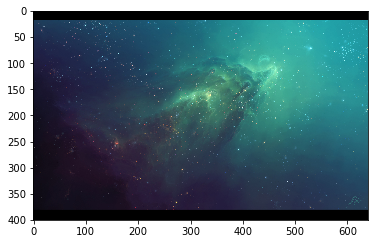

In [8]:
# Import background image
background = cv2.imread('./nebula.jpg')
plt.imshow(background)

background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.imshow(background_rgb)

# Resize image
background_rgb = cv2.resize(background_rgb, (0,0), fx=0.4,fy=0.4)
plt.imshow(background_rgb)
background_rgb.shape

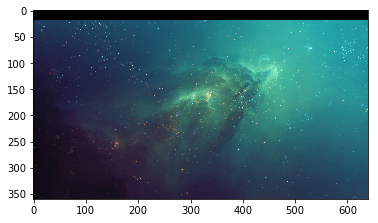

In [9]:
# Crop background
cropped_bg = background_rgb[:masked_image.shape[0],:masked_image.shape[1],:]
plt.imshow(cropped_bg)

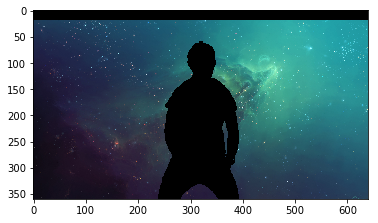

In [10]:
# Apply the mask again, but this time invert it (let the background show through)
cropped_bg[mask == 0] = [0 , 0 ,0]
plt.imshow(cropped_bg)

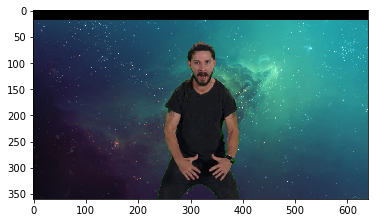

In [11]:
# Completed image = add both images together, since the background is 0
completed_image = masked_image + cropped_bg
plt.imshow(completed_image)